In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
project_df=pd.read_csv(r'd:\Data set\WA_Fn-UseC_-HR-Employee-Attrition.csv')
project_df

,Age,Attrition,Department,MonthlyIncome,PerformanceRating,YearsAtCompany
0,41.0,Yes,Sales,5993.0,3,6.0
1,NaN,No,Research & Development,5130.0,4,NaN
2,37.0,Yes,Research & Development,2090.0,3,0.0
3,33.0,No,Research & Development,2909.0,3,8.0
4,27.0,No,Research & Development,3468.0,3,2.0
...,...,...,...,...,...,...
1470,36.0,No,Research & Development,2571.0,3,5.0
1471,39.0,No,Research & Development,9991.0,3,7.0
1472,27.0,No,Research & Development,6142.0,4,6.0
1473,49.0,No,Sales,5390.0,3,9.0


### Question : How are salaries distributed among employees?

In [2]:
project_df.head()
project_df.tail()
# project_df.info()
# project_df.describe()
project_df.duplicated().sum()
project_df['Age'].isna().sum()
project_df[project_df['Age'].isna()]
Q1=project_df['Age'].quantile(0.25)
Q3=project_df['Age'].quantile(0.75)
iqr=Q3-Q1
project_df[(project_df['Age']<Q1-1.5*iqr) | (project_df['Age']>Q3+1.5*iqr)]
project_df['Age']=project_df['Age'].fillna(project_df['Age'].mean())
project_df['Age']=project_df['Age'].astype('int64')
project_df[project_df.duplicated()]
project_df['MonthlyIncome'].isna().sum()
project_df[project_df['MonthlyIncome'].isna()]
Q1=project_df['MonthlyIncome'].quantile(0.25)
Q3=project_df['MonthlyIncome'].quantile(0.75)
iqr=Q3-Q1
project_df[(project_df['MonthlyIncome']<Q1-1.5*iqr) | (project_df['MonthlyIncome']>Q3+1.5*iqr)]
project_df['MonthlyIncome']=project_df['MonthlyIncome'].fillna(project_df['MonthlyIncome'].mean())
project_df['MonthlyIncome']=project_df['MonthlyIncome'].astype(float)
project_df['Department'].isna().sum()
project_df[project_df['Department'].isna()]
project_df['Department']=project_df['Department'].fillna(project_df['Department'].mode()[0])
# project_df.info()
project_df['YearsAtCompany'].isna().sum()
project_df[project_df['YearsAtCompany'].isna()]
project_df['YearsAtCompany']=project_df['YearsAtCompany'].fillna(project_df['YearsAtCompany'].median())
# project_df.info()
project_df.duplicated().sum()
project_df[project_df.duplicated()]
project_df.drop_duplicates(inplace=True)
project_df

,Age,Attrition,Department,MonthlyIncome,PerformanceRating,YearsAtCompany
0,41,Yes,Sales,5993.0,3,6.0
1,36,No,Research & Development,5130.0,4,5.0
2,37,Yes,Research & Development,2090.0,3,0.0
3,33,No,Research & Development,2909.0,3,8.0
4,27,No,Research & Development,3468.0,3,2.0
...,...,...,...,...,...,...
1470,36,No,Research & Development,2571.0,3,5.0
1471,39,No,Research & Development,9991.0,3,7.0
1472,27,No,Research & Development,6142.0,4,6.0
1473,49,No,Sales,5390.0,3,9.0


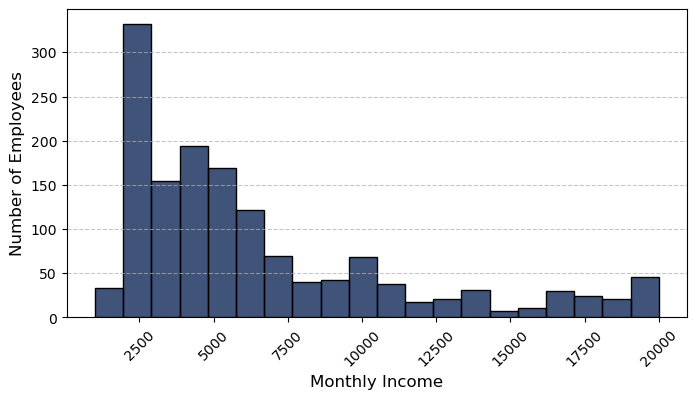

In [3]:
plt.figure(figsize=(8,4))
sns.histplot(project_df['MonthlyIncome'], bins=20, color="#00194C")
plt.xlabel('Monthly Income', fontsize=12)
plt.ylabel('Number of Employees', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Most employees earn salaries within a specific range, with fewer employees earning very high incomes.

### Question : Which department has the highest and lowest average salary?

C:\Users\vista\AppData\Local\Temp\ipykernel_1568\1236448595.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


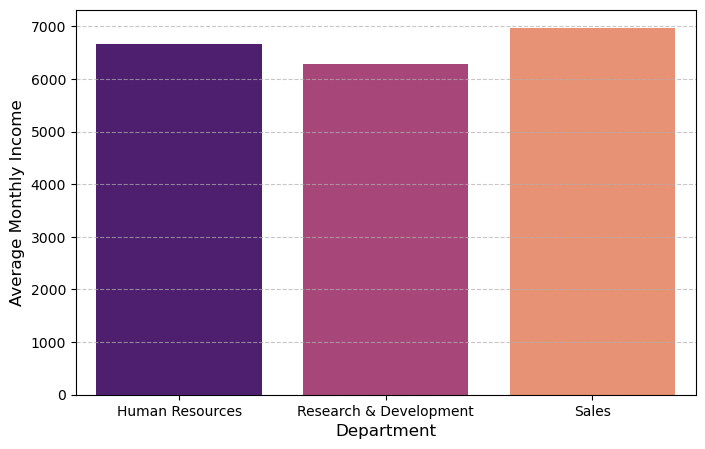

In [4]:
dept_salary=project_df.groupby('Department')['MonthlyIncome'].mean().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(
    data=dept_salary,
    x='Department',
    y='MonthlyIncome',
    palette='magma'
)
plt.xlabel('Department', fontsize=12)
plt.ylabel('Average Monthly Income', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### Sales has the highest average salary, while Research & Development has the lowest.

### Question : Relationship Between Numerical Variables?

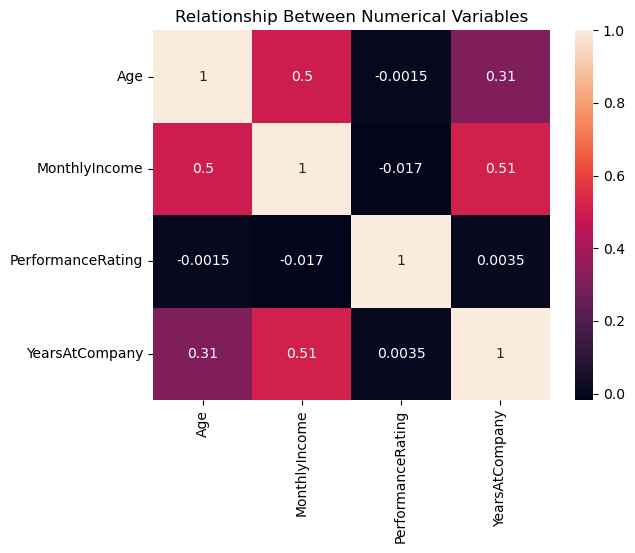

In [5]:
heat_map=project_df[['Age','MonthlyIncome','PerformanceRating','YearsAtCompany']].corr()
sns.heatmap(
    data=heat_map, 
    annot=True,
)
plt.title('Relationship Between Numerical Variables')

plt.show()

In [6]:
project_df[['Age','MonthlyIncome','PerformanceRating','YearsAtCompany']].corr()


,Age,MonthlyIncome,PerformanceRating,YearsAtCompany
Age,1.000000,0.497582,-0.001483,0.309620
MonthlyIncome,0.497582,1.000000,-0.017407,0.511629
PerformanceRating,-0.001483,-0.017407,1.000000,0.003517
YearsAtCompany,0.309620,0.511629,0.003517,1.000000


### 
Insight:
The correlation matrix shows that monthly income has a moderate positive relationship with years at company (≈ 0.52), while performance rating has almost no correlation with income. This suggests that experience plays a more important role in determining salary than performance ratings.

### Question : Does experience affect salary?

C:\Users\vista\AppData\Local\Temp\ipykernel_1568\1448935819.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  experience_affect['YearsAtCompany']=experience_affect['YearsAtCompany'].astype('int64')


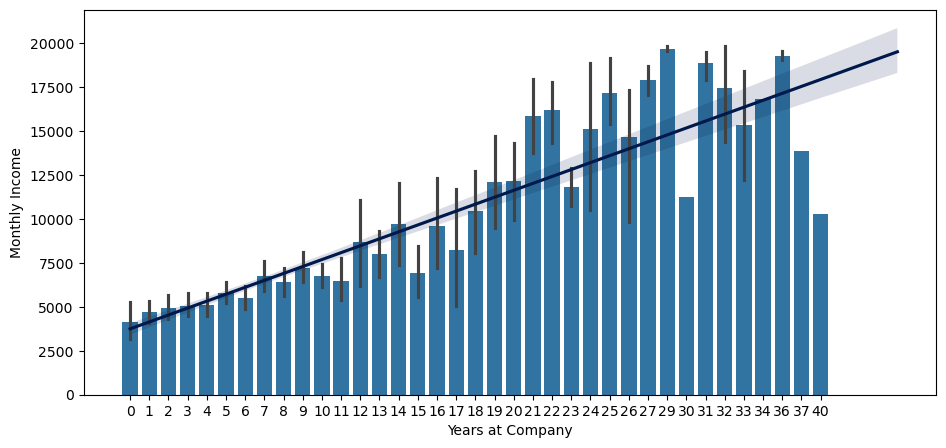

NameError: name 'y' is not defined

In [7]:
experience_affect=project_df[['MonthlyIncome','YearsAtCompany']]
experience_affect['YearsAtCompany']=experience_affect['YearsAtCompany'].astype('int64')
plt.figure(figsize=(11,5))
sns.barplot(
    data=experience_affect,
    x='YearsAtCompany',
    y='MonthlyIncome',
)
sns.regplot(
    data=experience_affect,
    x='YearsAtCompany',
    y='MonthlyIncome',
    scatter=False,
    color="#00194C"
)
plt.xlabel('Years at Company')
plt.ylabel('Monthly Income')
plt.show()
y.corr()


### There is a moderate positive relationship between years at company and monthly income, indicating that more experienced employees tend to earn higher salaries, although experience is not the only factor influencing pay.

### Question : Which departments have the highest employee attrition?

In [ ]:
project_df.groupby('Department')['Attrition'].count()

Department
Human Resources            63
Research & Development    962
Sales                     445
Name: Attrition, dtype: int64

C:\Users\vista\AppData\Local\Temp\ipykernel_19692\2053913353.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


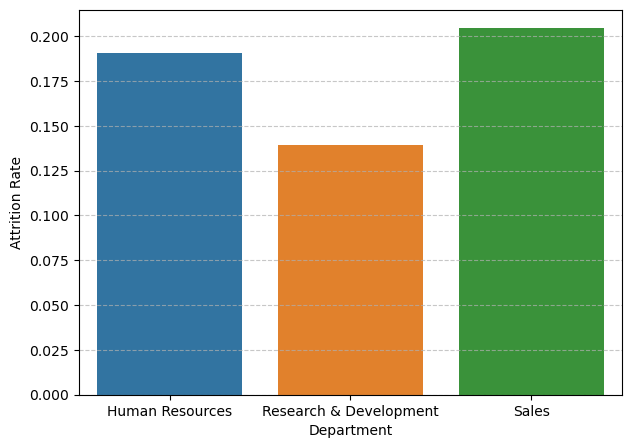

In [ ]:
Attrition_Yes =project_df.loc[(project_df['Attrition']=='Yes'),:]
Attrition_by_Department=Attrition_Yes.groupby('Department')['Attrition'].count().reset_index()
Attrition_by_All=project_df.groupby('Department')['Attrition'].count().reset_index()
Attrition_by_Department['Attrition']=Attrition_by_Department['Attrition']/Attrition_by_All['Attrition']
Attrition_by_Department
plt.figure(figsize=(7,5))
sns.barplot(
    data=Attrition_by_Department,
    x='Department',
    y='Attrition',
    palette='tab10'
)
plt.xlabel('Department')
plt.ylabel('Attrition Rate')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Attrition rates differ across departments, suggesting that some departments face higher employee turnover due to factors like low pay or management practices.

In [ ]:
project_df.to_csv('cleaned_employee_dataset.csv',index=False)